<div style="text-align: left;"><h1 style="color: #00205b; font-family: 'Georgia';">How Predictive Models Help British Airways Acquire Customers</h1>
<p style="font-size: small;">Author: Simontagbor</p>
<p style="font-size: small;">Last updated: 2024-01-16 </p>
</div>

---


<div style="text-align: center;">
<a href="https://github.com/Simontagbor" style="text-decoration: none; color: black; font-size: larger; margin-right: 20px;">
<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" height="35" style="vertical-align: middle; margin-right: 10px;">
</a>
<a href="https://www.kaggle.com/simontagbor" style="text-decoration: none; color: black; font-size: larger;">
<img src="https://www.kaggle.com/static/images/site-logo.png" height="30" style="vertical-align: middle; margin-right: 10px;">
</a>
</div>


---

> This project is about combating the problem of unstable buying cycle of British Airways customers using the power of predictive modeling. 
> The project was done as part of a job simulation as a Junior Data Scientist at British Airways.
> <p>In this Interactive Notebook I will show how I trained a predictive model with Random Forest on 5000 entries for customer booking data from British Airways.</p>
>  
> <p>The goal is to help British Airways acquire customers before the holidays.</p>
> <p>The project is divided into 4 parts:</p>
><ol>
>    <li>Exploratory Data Analysis</li>
>    <li>Data Cleaning and Preparation</li>
>    <li>Feature Engineering</li>
>    <li>Modeling and Evaluation</li>
></ol>
> The source code for this project can be found at my [github](https://github.com/Simontagbor/BritishAirways-predictive-ML) page. 
><p> You can also find the  Jupyter notebook and the dataset on my <a href="https://www.kaggle.com/simontagbor/british-airways-predictive-ml">kaggle page</a>.</p>




<h2>Project Overview</h2>

<em>For this project I completed the following tasks:</em>

- [x] Performed Exploratory Data Analysis.
- [x] Cleaned and Prepared the data for modeling.
- [x] Performed Feature Engineering.
- [x] Built and Evaluated models.
- [x] Test the model on unseen data.
- [x] Interpret the model results and make predictions.


<h2>Project  Dependencies</h2>

In [11]:
# import project libraries
import pandas as pd
import numpy as np # for linear algebra
import math # for math operations 

import seaborn as sns # for plotting

# handling files
import os 
import sys 

# data preprocessing
from sklearn.preprocessing import LabelEncoder

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt # for plotting
import squarify # for tree maps


<h2> Exploratory Data Analysis</h2>

<p>To understand the data, I performed exploratory data analysis. I used the following techniques to understand the data:</p>

- [x] Visual inspection of data.
- [x] Exploratory Data Visualizations.(Univariate, Bivariate and Multivariate analysis)


<h3>Visual Inspection of Data</h3>

In [12]:
df = pd.read_csv("predictive_model_data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The dataframe object has  a `.head()` method that allows us to view a specified number of rows in the dataset. This method came in handy for visual inspection of the dataset and to get a feel of the data.

In [13]:
# retrieve a summarised info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The summary on the columns indicates that there are:
<ul>
<li><strong>14 unique columns</strong></li>
<li><strong>5000 rows</strong></li>
<li><strong>Zero null values (which is good!)</strong></li>
<li><strong>Three unique data types (int64, float64 and object)</strong></li>
</ul>

Here is a more detailed data description, explaining exactly what each column means:
<details>
<summary>Click to expand!</summary>
<ul>
  <li><code>num_passengers</code> = the number of passengers associated with a particular flight booking.</li>
  <li><code>sales_channel</code> = indicates the channel through which the flight booking was made.</li>
  <li><code>trip_type</code> = indicates the trip Type (Round Trip, One Way, Circle Trip)</li>
  <li><code>purchase_lead</code> = the number of days between travel date and booking date</li>
  <li><code>length_of_stay</code> = the number of days spent at destination</li>
  <li><code>flight_hour</code> = represents the scheduled departure or arrival time of the flight</li>
  <li><code>flight_day</code> = day of week of flight departure</li>
  <li><code>route</code> = origin -> represents the destination flight route</li>
  <li><code>booking_origin</code> = shows the country from where booking was made</li>
  <li><code>wants_extra_baggage</code> = indicates if the customer wanted extra baggage in the booking</li>
  <li><code>wants_preferred_seat</code> = indicates if the customer wanted a preferred seat in the booking</li>
  <li><code>wants_in_flight_meals</code> = if the customer wanted in-flight meals in the booking</li>
  <li><code>flight_duration</code> = shows the total duration of flight (in hours)</li>
  <li><code>booking_complete</code> = indicates if the customer completed the booking</li>
</ul>
</details>

Considering the unique data types, I decided to perform **label encoding** to convert the categorical variables to numerical variables. converting categorical variables to numerical representations will allow me to use machine learning algorithms effectively.

<p>In our case the ideal candidate for label encoding is: <code>flight_day</code>. this is because it is currently a nominal variable with no order or hierarchy.</p>


In [14]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

 
<p>As can be seen the current days of the week have no order or hierarchy.</p>
<p>To encode this variable I will map the days of the week to the following numerical representations:</p> 

In [15]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

# set the new values
df["flight_day"] = df["flight_day"].map(mapping)

In [16]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

As can be seen the `fligt_days` column has been successfully encoded.

<h3>Summary Statistics</h3>

In [17]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<h4>Some Highlights from The summary statistics</h4>

1. The majority of bookings involve a small ` number of passengers `, with 75% of the bookings having either 1 or 2 passengers. However, there are cases with up to 9 passengers.

2. The average ` purchase lead ` time is approximately 85 days, indicating that customers typically book flights well in advance of their travel dates. Inferring from the significant difference between the mean and the median(50th percentile) the distribution is positively-skewed. The predictive model will be trained with ` Random Forest ` Algorithm so it is important to note that this algorithm is not sensitive to outliers.

3. It's also interesting to point out that the average ` length of stay ` is approximately 23 days, indicating that customers typically stay at their destination for a short period of time. However, the maximum length of stay is 778 days, suggesting some outliers or potentially long-term bookings.

<p>Further inspection of the data will help us understand the data better.</p>

<h4>Checking for Missing Values</h4>

In [18]:
### Check for Nmissing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

<h3>Exploratory Visualizations of the data</h3>
I perfomed further exploratory data analysis using visualizations. I used the following techniques to understand the data:

- [x] Univariate Analysis
- [x] Bivariate Analysis
- [x] Multivariate Analysis

<h4> Univariate analysis</h4>
My goal for this initial step was to understand the distribution of each variable in the dataset. I used the following techniques to understand the distribution:

- [x] distribution plots

hopefully, patterns and outliers would emerge from this analysis that would help me understand the data better.

- `num_passengers`
- `purchase_lead`
- `flight_day`
- `Sales_channel`
- `trip_type`
- `booking_origin`
- `flight_duration`
- `booking_complete`
- `route`

I examined the above selected variables in the dataset using distribution plots. The plots below show the distribution of the following variables:

In [19]:
# source code for visualisation can be found 
# at my Github gist:https://gist.github.com/Simontagbor/643a81b10ed2bd0d8d6542db8ddc53e2 

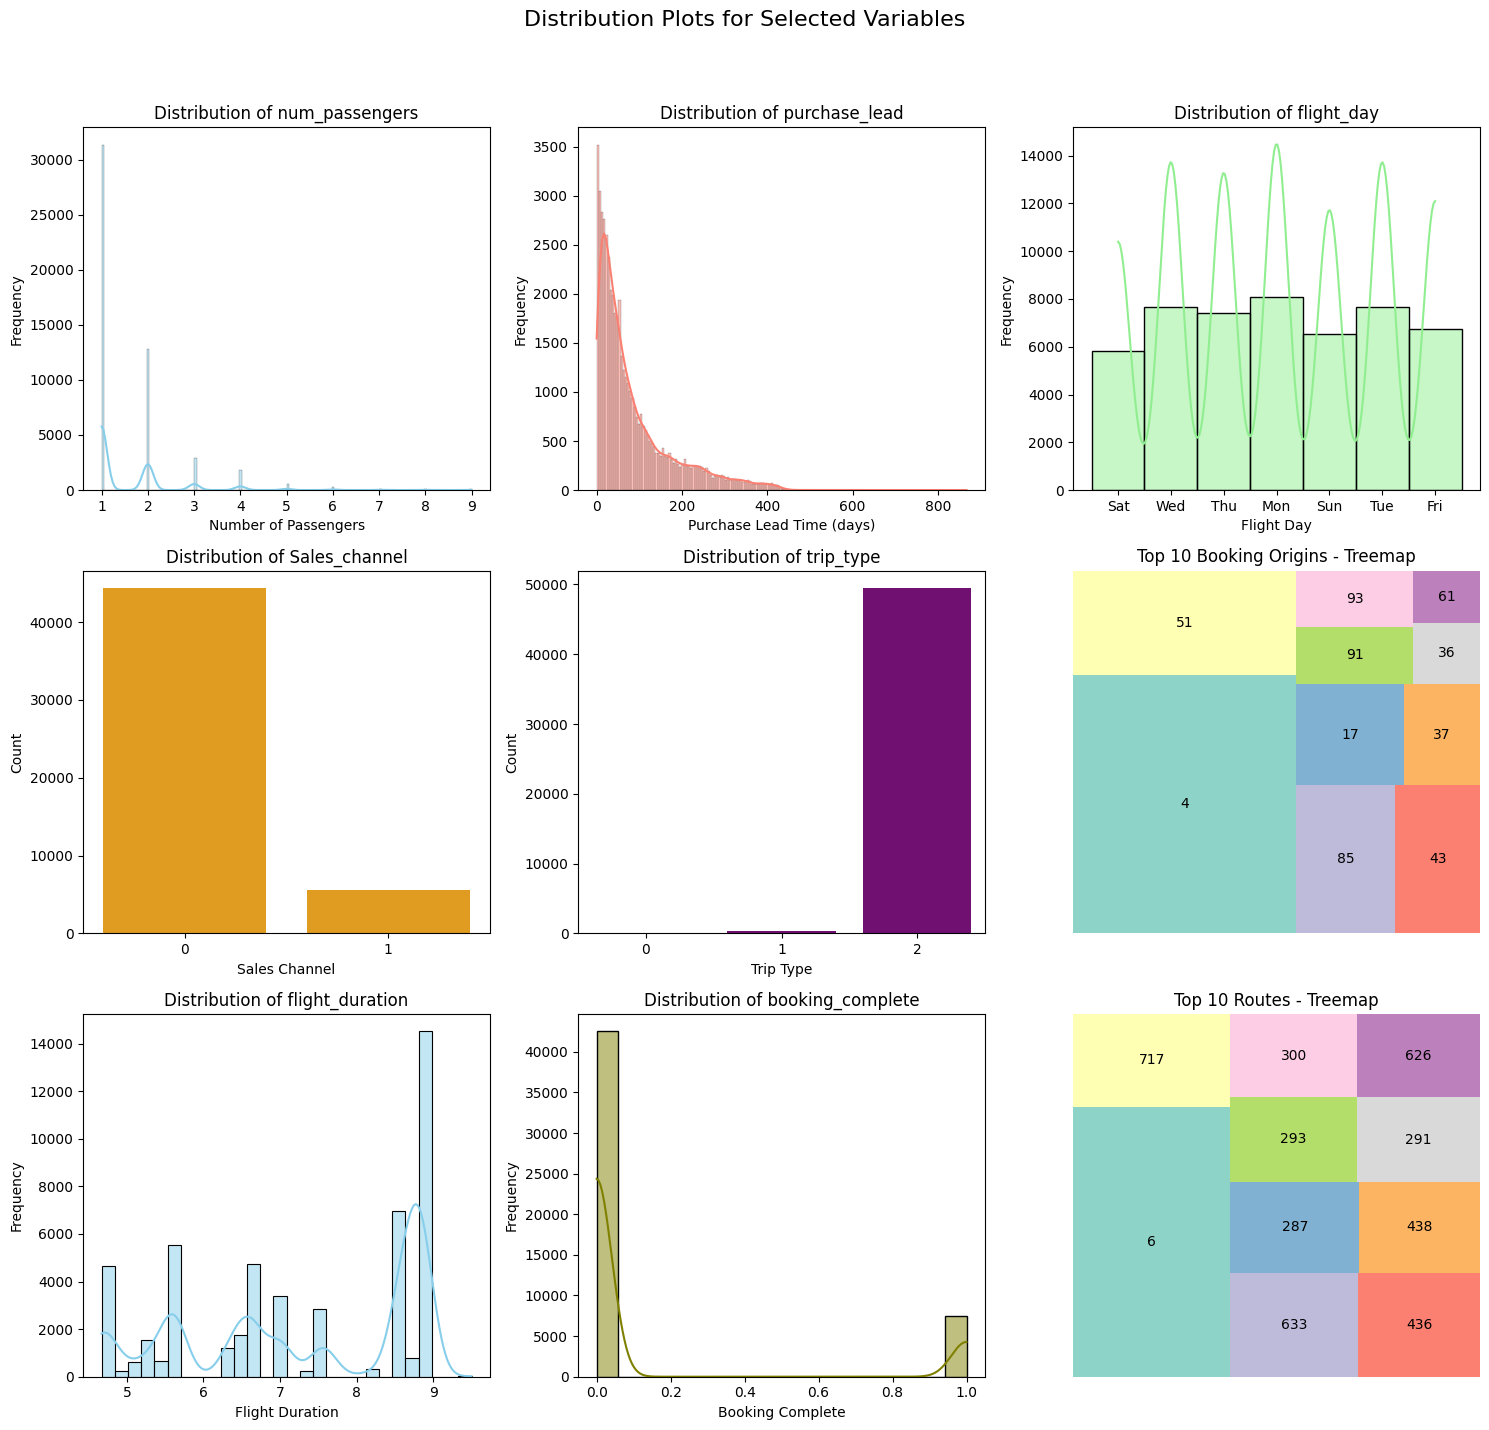

<Figure size 640x480 with 0 Axes>

In [29]:
#| code-fold: true
#| code-summary: "Show the code"

# Convert numeric weekday to corresponding day names
weekday_mapping = {1: 'Mon', 2: 'Tue', 3: 'Wed',
                    4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
# Set up the grid layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Distribution Plots for Selected Variables', 
             fontsize=16)
# Create a copy of the DataFrame
df_copy = df.copy()
# Apply the mapping to the copy
df_copy['flight_day'] = df_copy['flight_day'].map(weekday_mapping)
# Plotting num_passengers
sns.histplot(data=df_copy, x='num_passengers',
             kde=True, color='skyblue',
            ax=axes[0, 0])
axes[0, 0].set_title('Distribution of num_passengers')
axes[0, 0].set_xlabel('Number of Passengers')
axes[0, 0].set_ylabel('Frequency')
# Plotting purchase_lead
sns.histplot(data=df_copy, x='purchase_lead', 
             kde=True, color='salmon', 
             ax=axes[0, 1])
axes[0, 1].set_title('Distribution of purchase_lead')
axes[0, 1].set_xlabel('Purchase Lead Time (days)')
axes[0, 1].set_ylabel('Frequency')
# Plotting flight_day with day labels
sns.histplot(data=df_copy, x='flight_day',
            kde=True, color='lightgreen', 
            ax=axes[0, 2])
axes[0, 2].set_title('Distribution of flight_day')
axes[0, 2].set_xlabel('Flight Day')
axes[0, 2].set_ylabel('Frequency')
# Plotting Sales_channel
sns.countplot(data=df_copy, x='sales_channel',
               color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sales_channel')
axes[1, 0].set_xlabel('Sales Channel')
axes[1, 0].set_ylabel('Count')
# Plotting trip_type
sns.countplot(data=df_copy, x='trip_type',
               color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of trip_type')
axes[1, 1].set_xlabel('Trip Type')
axes[1, 1].set_ylabel('Count')
# Adding the treemap for booking_origin (top 10 countries only)
top_10_origin_counts = df_copy['booking_origin'].value_counts().nlargest(10)
axes[1, 2].axis('off')  # Turn off axis for treemap
squarify.plot(sizes=top_10_origin_counts, 
              label=top_10_origin_counts.index, 
              color=sns.color_palette("Set3"), ax=axes[1, 2])
# Adding title to the treemap
axes[1, 2].set_title('Top 10 Booking Origins - Treemap')
# Plotting flight_duration
sns.histplot(data=df_copy, x='flight_duration', 
             kde=True, color='skyblue', 
             ax=axes[2, 0])
axes[2, 0].set_title('Distribution of flight_duration')
axes[2, 0].set_xlabel('Flight Duration')
axes[2, 0].set_ylabel('Frequency')
# Plotting booking_complete
sns.histplot(data=df_copy, x='booking_complete',
             kde=True, color='olive',
             ax=axes[2, 1])
axes[2, 1].set_title('Distribution of booking_complete')
axes[2, 1].set_xlabel('Booking Complete')
axes[2, 1].set_ylabel('Frequency')
# Plotting route
# Get the top 10 routes
top_10_routes = df_copy['route'].value_counts().nlargest(10)
# Plotting route
axes[2, 2].axis('off')  # Turn off axis for treemap
squarify.plot(sizes=top_10_routes, 
              label=top_10_routes.index, 
              color=sns.color_palette("Set3"),
              ax=axes[2, 2])
axes[2, 2].set_title('Top 10 Routes - Treemap')
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Show the plots
plt.show()
# Plotting flight_day with day labels
sns.histplot(data=df_copy, x='flight_day',
            kde=True, color='lightgreen', 
            ax=axes[0, 2])
axes[0, 2].set_title('Distribution of flight_day')
axes[0, 2].set_xlabel('Flight Day')
axes[0, 2].set_ylabel('Frequency')
# Plotting Sales_channel
sns.countplot(data=df_copy, x='sales_channel',
               color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sales_channel')
axes[1, 0].set_xlabel('Sales Channel')
axes[1, 0].set_ylabel('Count')
# Plotting trip_type
sns.countplot(data=df_copy, x='trip_type',
               color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of trip_type')
axes[1, 1].set_xlabel('Trip Type')
axes[1, 1].set_ylabel('Count')
# Adding the treemap for booking_origin (top 10 countries only)
top_10_origin_counts = df_copy['booking_origin'].value_counts().nlargest(10)
axes[1, 2].axis('off')  # Turn off axis for treemap
squarify.plot(sizes=top_10_origin_counts, 
              label=top_10_origin_counts.index, 
              color=sns.color_palette("Set3"), ax=axes[1, 2])
# Adding title to the treemap
axes[1, 2].set_title('Top 10 Booking Origins - Treemap')
# Plotting flight_duration
sns.histplot(data=df_copy, x='flight_duration', 
             kde=True, color='skyblue', 
             ax=axes[2, 0])
axes[2, 0].set_title('Distribution of flight_duration')
axes[2, 0].set_xlabel('Flight Duration')
axes[2, 0].set_ylabel('Frequency')
# Plotting booking_complete
sns.histplot(data=df_copy, x='booking_complete',
             kde=True, color='olive',
             ax=axes[2, 1])
axes[2, 1].set_title('Distribution of booking_complete')
axes[2, 1].set_xlabel('Booking Complete')
axes[2, 1].set_ylabel('Frequency')
# Plotting route
# Get the top 10 routes
top_10_routes = df_copy['route'].value_counts().nlargest(10)
# Plotting route
axes[2, 2].axis('off')  # Turn off axis for treemap
squarify.plot(sizes=top_10_routes, 
              label=top_10_routes.index, 
              color=sns.color_palette("Set3"),
              ax=axes[2, 2])
axes[2, 2].set_title('Top 10 Routes - Treemap')
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Show the plots
plt.show()

#| code-fold: true

<details>
<summary>Click to Read My Observations!</summary>

The Univariate analysis revealed the following insights:
the distribution of `num_passengers` is positively skewed with a long tail. This indicates that the majority of bookings involve a small number of passengers. 

The distribution of `purchase_lead` is positively skewed with a long tail. This means that most passengers book their flights well in advance of their travel dates.for the purposes of predicting buying behaviour it informs my hypothesis that the longer the purchase lead time the more likely the customer to not complete the booking.

The distribution of `flight_day` is uniform. This means that the bookings are evenly distributed across the days of the week. This is an interesting insight because it may suggest that the day of the week does not have a significant impact on the buying behaviour of customers.

The distribution of `sales_channel` is skewed to the right. This means that the majority of bookings are made through the online channel. The right skewness indicates that there might be a long tail of other channels, but they are less frequent.

The distribution of `trip_type` is also positively-skewed, indicating that the majority of bookings are for round trips. While this suggests a prevalent preference for round trips, it is essential to conduct further bivariate analysis to confirm whether trip type significantly influences customer buying behavior."

The majority of `flight_origins` are from Australia, while there are relatively even distributions among the remaining origins. This observation may suggest a low correlation between flight origin and buying behavior. However, further bivariate analysis will be conducted to confirm this hypothesis.

Similarly the majority of `route` is AKLKUL indicating that the majority of customers book flights from Auckland to Kuala Lumpur. This is a very interesting insight because it suggests that there is a significant number of customers who book flights from Auckland to Kuala Lumpur.

The distribution of `flight_duration` is quite skewed to the left. This means that a significant number of flights are short-haul flights. This observation may suggest a low correlation between flight duration and buying behavior. However, further bivariate analysis will be conducted to confirm this hypothesis.

Majority of  `booking_complete` is 0 indicating that the majority of customers do not complete the booking. This is a very interesting insight because it suggests that there is a significant number of customers who do not complete the booking.
</details>

<h4> Bivariate analysis Using Heat Maps</h4>

My goal for this step was to understand the relationship between each variable and the target variable. For the purposes of this project, the target variable is `booking_complete`.
Considering that there are 14 variables I decided to use heatmaps to visualize the correlation between each variable and the target variable. 

I chose the heatmap because it allowed me to visualize the correlation between each variable and the target variable in one plot. This is a very efficient way to visualize the correlation between variables.

Before the Bivariate analysis, I Had some hypotheses about the relationship between the variables and the target variable. The hypotheses were as follows:

- [x] The longer the `purchase_lead` time the more likely the customer to not complete the booking.
- [x] The `flight_day` does not have a significant impact on the buying behaviour of customers.
- [x] The `trip_type` does not have a significant impact on the buying behaviour of customers.
- [x] The `flight_origin` does not have a significant impact on the buying behaviour of customers.
- [x] the `sales_channel` may have a significant impact on the buying behaviour of customers.

<h5>Preprocessing the data for Bivariate analysis</h5>

some of the variables in the dataset are categorical variables. To perform bivariate analysis on these variables I need to convert them to numerical representations. Intead of manual encoding, I used the `LabelEncoder` from the `sklearn.preprocessing` module to convert the categorical variables to numerical representations.

The correalation matrix requres all variables to have numerical representations. Hence the need to label encode the remaining categorical variables:
<ul><li><code>sales_channel</code></li>
<li><code>trip_type</code></li>
<li><code>booking_origin</code></li>
<li><code>route</code></li>
<li><code>wants_extra_baggage</code></li>
<li><code>wants_preferred_seat</code></li>
<li><code>wants_in_flight_meals</code></li>
</ul>


In [21]:
#| code-fold: true
#| code-summary: "Show Label Encoding code"
# label encode the categorical variables
label_encoder = LabelEncoder()
df['booking_origin'] = label_encoder.fit_transform(df['booking_origin'])
df['route'] = label_encoder.fit_transform(df['route'])
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])
df['wants_extra_baggage'] = label_encoder.fit_transform(df['wants_extra_baggage'])
df['wants_in_flight_meals'] = label_encoder.fit_transform(df['wants_in_flight_meals'])
df['wants_preferred_seat'] = label_encoder.fit_transform(df['wants_preferred_seat'])

According to the sklearn documentation, the `LabelEncoder` encodes labels with values between 0 and n_classes-1. This means that the label encoder will assign a numerical representation to each unique value in the categorical variables.

let's comfirm that the categorical variables have been successfully encoded.

In [22]:
# check the data types
df.head()
df.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

Now that the categorical variables have been successfully encoded. I can proceed to perform bivariate analysis.

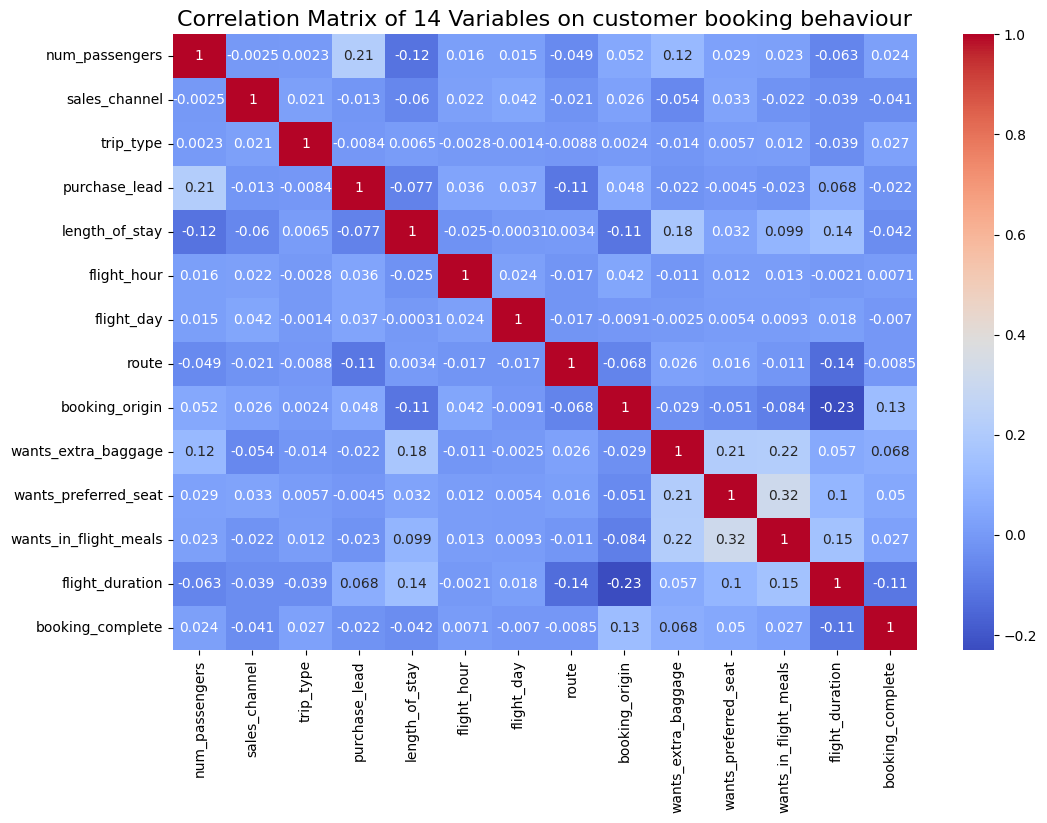

In [23]:
# perform Bivariate analysis using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of 14 Variables on customer booking behaviour',
           fontsize=16)

# Show the plot
plt.show()

<h5>My Observations of Relationship between Booking Completions and 13 Other Variables </h5>

<details><summary>Click to Read Detailed Observations!</summary>
<ul>
<li><strong>Booking Origin:</strong>
<ul>
<li><em>Correlation Coefficient:</em> 0.13</li>
<li><em>Interpretation:</em> There's a notable positive relationship (0.13) between booking origin and booking completions, suggesting that specific booking origins play a relatively significant role in determining completion likelihood.</li>
</ul>
</li>

<li><strong>Flight Duration:</strong>
<ul>
<li><em>Correlation Coefficient:</em> -0.11</li>
<li><em>Interpretation:</em> The negative correlation coefficient (-0.11) implies that longer flight durations may be associated with a lower likelihood of booking completions.</li>
</ul>
</li>

<li><strong>Wants Extra Baggage:</strong>
<ul>
<li><em>Correlation Coefficient:</em> 0.068</li>
<li><em>Interpretation:</em> With a positive coefficient (0.068), the desire for extra baggage seems to have a fair contribution to the likelihood of completing bookings.</li>
</ul>
</li>

<li><strong>Length of Stay:</strong>
<ul>
<li><em>Correlation Coefficient:</em> -0.042</li>
<li><em>Interpretation:</em> A slightly negative correlation coefficient (-0.042) indicates a modest reverse relationship between length of stay and booking completion.</li>
</ul>
</li>

<li><strong>Wants Inflight Meals and Trip Type:</strong>
<ul>
<li><em>Correlation Coefficient:</em> Positive (Same for both)</li>
<li><em>Interpretation:</em> Both exhibit a positive contribution to booking completion, suggesting that customers expressing interest in inflight meals or specific trip types may be slightly more likely to complete their bookings.</li>
</ul>
</li>
</ul>
</details>

<summary>In summary, analysis of the heat map reveals key correlations with booking completions. Notably, specific booking origins play a significant role (correlation coefficient of 0.13), while longer flight durations show a negative correlation (-0.11) with completion likelihood. Surprisingly, the desire for extra baggage positively contributes (correlation coefficient of 0.068), while length of stay exhibits a modest reverse relationship (-0.042). Customer preferences for inflight meals and certain trip types positively influence completion likelihood. These findings provide valuable insights for further exploration and feature engineering in predictive modeling efforts. </summary>

<h2>Modeling and Evaluation</h2>


<h3>Feature Selection</h3>